## #413yaw99
### The analysis of Gini index data is proceeded with following
- for a workable time series data, I only extracted the data that consist of recurring time-variant observations in the respective country. Then, I checked the missing values via heatmap
- I made sure that the country names are valid using validate_country(), and if not, I built a column with the valid country names. Then, the continent name of the respective country can be constructed for further analysis.
- next, I took care of the missing values: I first transposed the dataset, and then applied the moving averages approach (window=5,min_periods=1) to fill up missing values in time series data of the respective country. After that, I made sure that all missing gaps are filled prior to ploting.
- in my view, it is not ideal to plot country-specific values across years for visualization, I therefore aggregated the values based on the continent-level for the purpose of visualization

In [2]:
import pycountry as pc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dataprep.clean import clean_country
from dataprep.clean import validate_country
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("gini.csv")
df.rename(columns = {'GINI index' : 'country'}, inplace = True)
df = df.set_index('country', drop=False)  #set country as index but keep column
df=df.dropna(axis=1, how='all')   # Drop the columns where all elements are nan
df=df.dropna(axis=0,thresh = 5)   #Keep only the rows with at least 5 non-nan values

<AxesSubplot:title={'center':'missing value distribution'}, xlabel='country'>

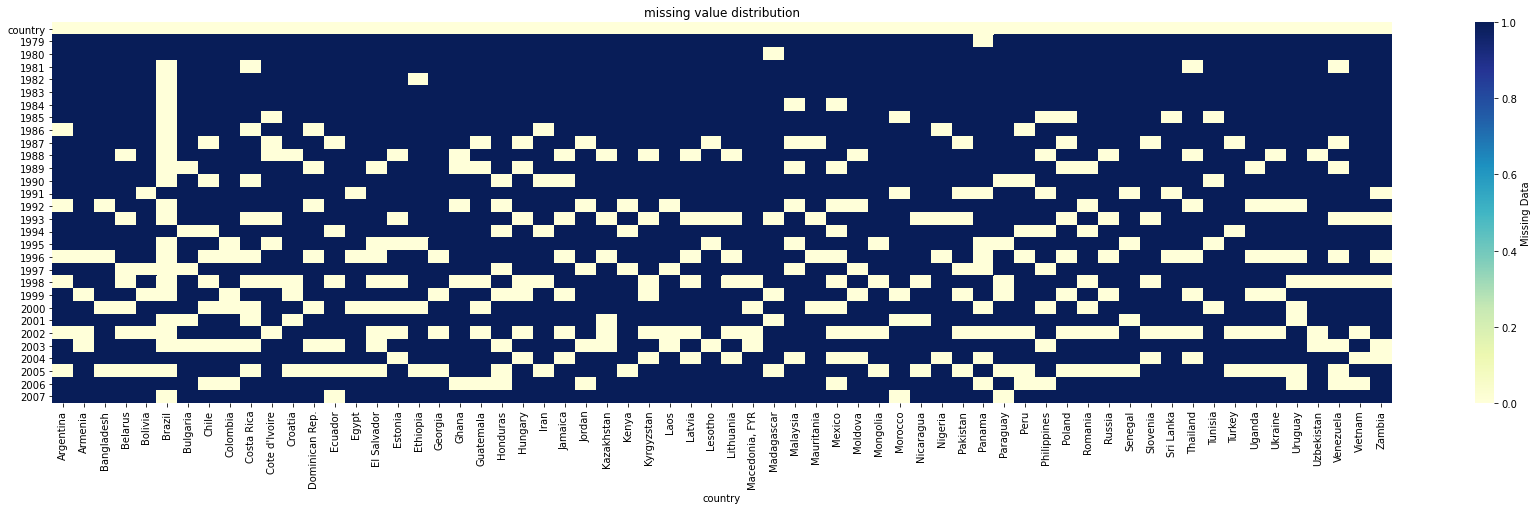

In [4]:
plt.figure(figsize=(30,7))
plt.title('missing value distribution')
sns.heatmap(df.isna().transpose(),cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [5]:
df["valid"] = validate_country(df["country"])
c=clean_country(df, "country",input_format="name", output_format="name",fuzzy_dist=1, inplace=False)
df=pd.DataFrame(c)
df.head()

  0%|          | 0/9 [00:00<?, ?it/s]

Country Cleaning Report:
	3 values cleaned (4.69%)
Result contains 64 (100.0%) values in the correct format and 0 null values (0.0%)


,country,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2000,2001,2002,2003,2004,2005,2006,2007,valid,country_clean
country,,,,,,,,,,,,,,,,,,,,,
Argentina,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.51,NaN,...,NaN,NaN,52.52,NaN,NaN,50.03,NaN,NaN,True,Argentina
Armenia,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.66,33.8,NaN,NaN,NaN,NaN,True,Armenia
Bangladesh,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.72,NaN,NaN,NaN,NaN,31.02,NaN,NaN,True,Bangladesh
Belarus,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.35,NaN,29.73,NaN,NaN,27.92,NaN,NaN,True,Belarus
Bolivia,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60.24,NaN,NaN,58.19,NaN,NaN,True,Bolivia


In [6]:
import pycountry_convert as pc
# some country name wasn't recognized as a country, this can be rechecked based on info of ISO 3166-1 alpha-2: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2
df['country_clean'].mask(df['country_clean'] == 'DR Congo', "Democratic Republic of the Congo", inplace=True)
df['country_clean'].mask(df['country_clean'] == 'Congo Republic', "Congo", inplace=True)
df['country_clean'].mask(df['country_clean'] == "Cote d'Ivoire", "Côte d'Ivoire", inplace=True)
# generating respective continent info
df['country_code'] = [pc.country_name_to_country_alpha2(x, cn_name_format="default") for x in df['country_clean']]
df['continent_code']= [pc.country_alpha2_to_continent_code(x) for x in df['country_code']]
df['continent']= [pc.country_alpha2_to_continent_code(x) for x in df['country_code']]
#map continent codes to name
conti_names={"AS":"Asia","AF": "Africa","EU":"Europe","SA":"South America","OC":"Oceania","NA":"North America"}
df["continent"]=df["continent_code"].map(conti_names)
df.head()

,country,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2003,2004,2005,2006,2007,valid,country_clean,country_code,continent_code,continent
country,,,,,,,,,,,,,,,,,,,,,
Argentina,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.51,NaN,...,NaN,NaN,50.03,NaN,NaN,True,Argentina,AR,SA,South America
Armenia,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.8,NaN,NaN,NaN,NaN,True,Armenia,AM,AS,Asia
Bangladesh,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.02,NaN,NaN,True,Bangladesh,BD,AS,Asia
Belarus,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.92,NaN,NaN,True,Belarus,BY,EU,Europe
Bolivia,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.19,NaN,NaN,True,Bolivia,BO,SA,South America


In [7]:
df=df.drop(["country","valid"],axis=1).reset_index()
#df.fillna(method='ffill') 
df_new=pd.melt(df, id_vars=["country",'country_code', 'continent_code', 'country_clean', 'continent'], var_name='year')
df_new.sort_values(by=["country_clean","continent"],inplace=True)
df_new.head()

,country,country_code,continent_code,country_clean,continent,year,value
0,Argentina,AR,SA,Argentina,South America,1979,NaN
64,Argentina,AR,SA,Argentina,South America,1980,NaN
128,Argentina,AR,SA,Argentina,South America,1981,NaN
192,Argentina,AR,SA,Argentina,South America,1982,NaN
256,Argentina,AR,SA,Argentina,South America,1983,NaN


In [8]:
# forward, backward, interpolate fill seems not ideal, so I got for moving averages
# applying moving average country-specifically
df_new['value_moving_avg']=df_new.groupby("country_clean")["value"].transform(lambda x: x.rolling(window=5,min_periods=1).mean()).fillna(method='bfill') 
df_new.head()

,country,country_code,continent_code,country_clean,continent,year,value,value_moving_avg
0,Argentina,AR,SA,Argentina,South America,1979,NaN,44.51
64,Argentina,AR,SA,Argentina,South America,1980,NaN,44.51
128,Argentina,AR,SA,Argentina,South America,1981,NaN,44.51
192,Argentina,AR,SA,Argentina,South America,1982,NaN,44.51
256,Argentina,AR,SA,Argentina,South America,1983,NaN,44.51


In [9]:
df_new.value_moving_avg.isnull().sum()  # make sure that value_moving_avg is completely filled, without missing values

0

Text(0.5, 1.0, 'Visulisation of country-specific Gini trend across years')

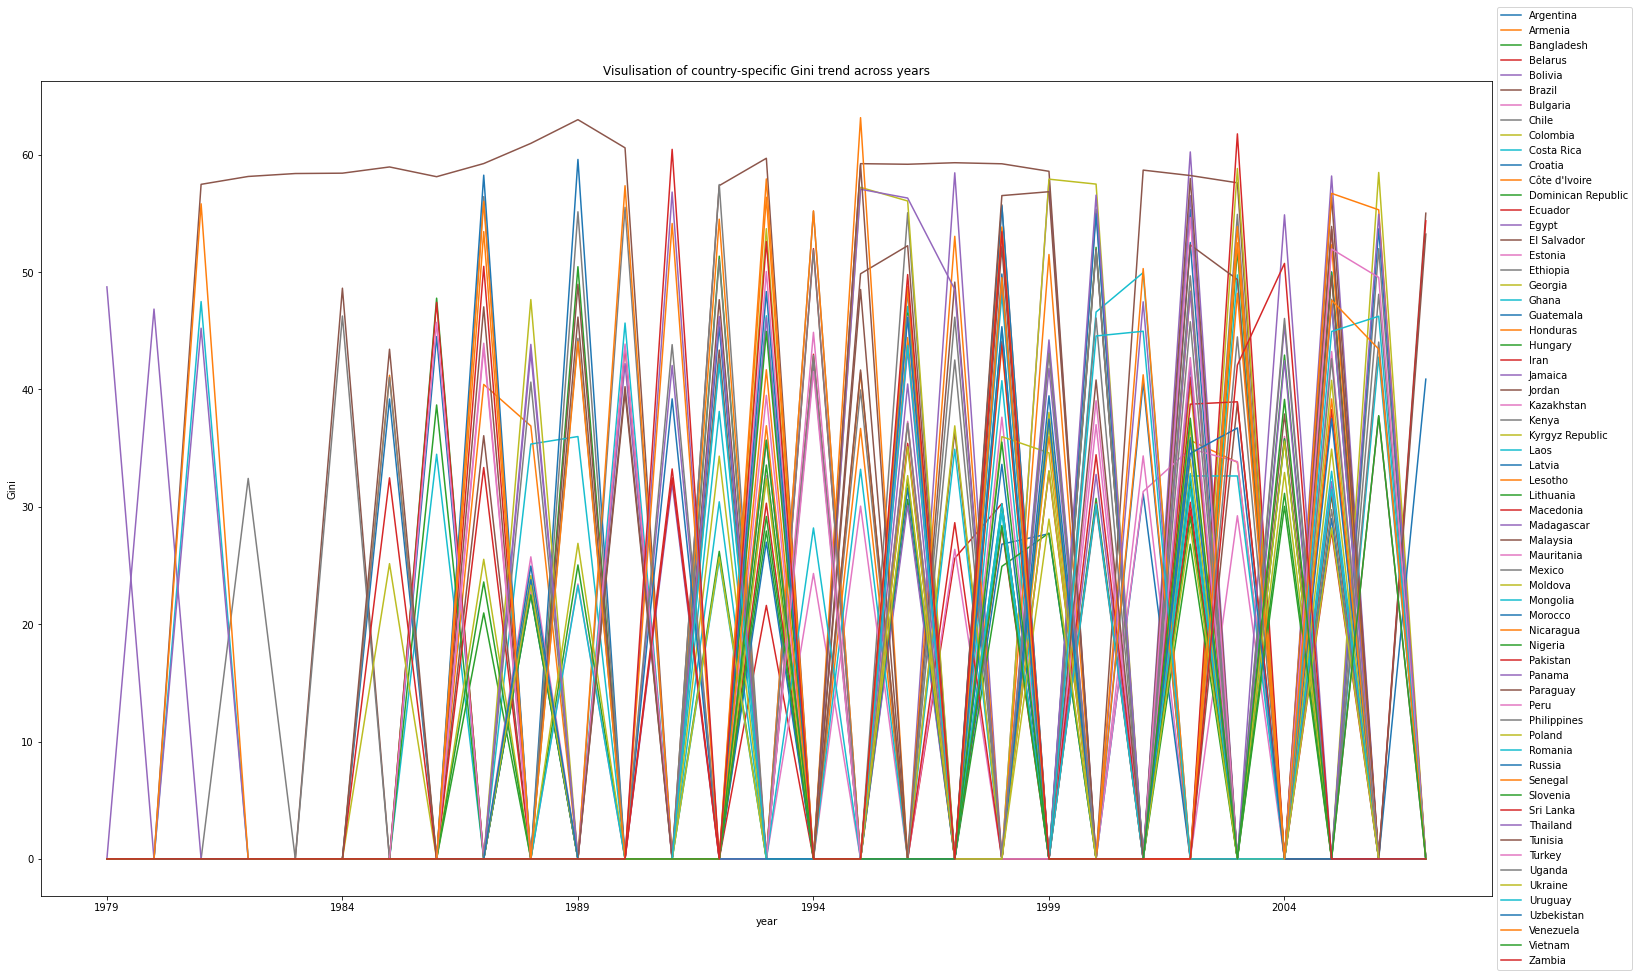

In [10]:
## Ploting time series country specific graph is a mess (see below)...thus, I would like to see the visualisation at a higher level with the aggregated value based on continents
df_new.pivot_table(index='year',columns='country_clean',values='value',aggfunc='sum').plot(figsize= (26,15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Gini")
plt.title('Visulisation of country-specific Gini trend across years')

Text(0.5, 1.0, 'Visulisation of continent-specific Gini trend across years')

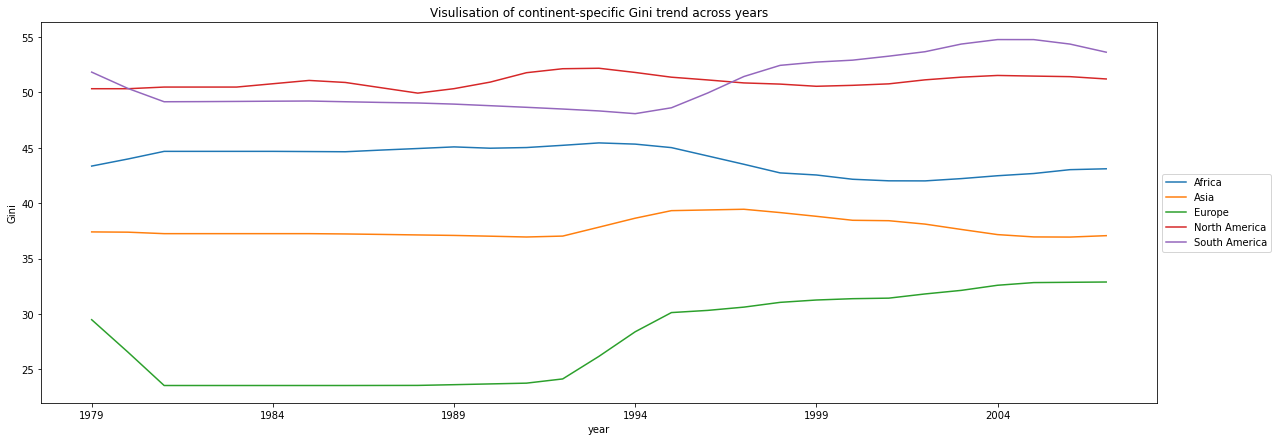

In [11]:
## a continent-level visualization provides a better overview regarding the gini index across times
df_new['avg_by_continent']=df_new.groupby("continent")["value_moving_avg"].transform(lambda x: x.rolling(window=3,min_periods=1).mean())  #extracting mean Gini measures
df_new.pivot_table(index='year',columns='continent',values='avg_by_continent',aggfunc='mean').plot(figsize= (20,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Gini")
plt.title('Visulisation of continent-specific Gini trend across years')